## - This is basic NLP techniques tutorial.

### - We will learn about
    A. Word2Vec
    B. Spacy
    C. CosineSimilarity
    D. Genesim/GloVE/CBOW - What are these?
    E. Intent classification using NLP - 
    F. Support Vector Machines for classification and regression tasks
    G. How RASA uses NLU for INtent identification

## Getting Started

- We have downloaded GloVE word embedding (6B words) which will provide vector representation of commonly used words. There are multiple word embeddings available like Facebook FastText, ELMO, Bag Of Words etc..

- GLoVE emedding are available in 50-100-200 dimensions, and size on disk will vary accordingly.

# - so what is Word2Vec

Word2Vec is a collection of models that take a corpus and produces vector embedding for words. GloVE is a pre-trained model and we can directly use vector embeddings in word2vec

In [155]:
import numpy as np

with open("./glove/glove.6B/glove.6B.50d.txt", "r") as lines:
    w2v = {line.split()[0]: np.array(line.split()[1:])
           for line in lines}
    

We can look into vector represntation of any word available in the GloVE corpus.
Every word is represented in a vector of size(50,)


In [161]:
word1 = w2v['book']
print(word1)


word2 = w2v['my']
print(word2)


word3 = w2v['flight']
print(word3)

['-0.0076543' '0.93456' '-0.73189' '-0.55162' '0.76977' '0.35925'
 '-1.1365' '-1.1632' '0.34214' '0.29145' '-0.8711' '0.9197' '-0.47069'
 '-0.22834' '1.4777' '-0.81714' '-0.17466' '-0.51093' '-0.28354' '0.23292'
 '0.71832' '0.23414' '0.49443' '0.35483' '0.76889' '-1.4374' '-1.7457'
 '-0.28994' '-0.10156' '-0.36959' '2.5502' '-1.0581' '-0.049416'
 '-0.25524' '-0.63303' '0.02671' '-0.18733' '0.20206' '-0.26288'
 '-0.41418' '0.83473' '-0.14227' '-0.28125' '0.098155' '-0.17096'
 '0.52408' '0.31851' '-0.089847' '-0.27223' '-0.0088736']
['-0.27279' '0.77515' '-0.10181' '-0.9166' '0.90477' '-0.070501'
 '-0.47569' '0.44608' '0.1697' '0.072352' '-0.16306' '0.86852' '-0.76634'
 '-0.016103' '0.78492' '0.2952' '-0.74859' '0.2099' '0.65537' '-0.62334'
 '-0.43711' '1.1854' '0.47519' '0.0093866' '1.1377' '-2.4394' '-1.5619'
 '0.49001' '1.0985' '-0.97371' '3.4628' '1.0408' '-0.65138' '0.57189'
 '-0.12523' '0.26705' '0.16373' '0.41105' '0.7509' '-0.77923' '0.03638'
 '-0.28609' '-0.72365' '0.63511' '0.0

### - CosineSimilarity provides how similar words are to each other. This concept is used heavily in NLP especially intent classification.

-- If 2 vectors are similar, there cosine similarity will be 1. If orthogonal to each other, cosine similarity will be 0.

-- To understand this we need to learn linear algebra concepts - dot product of vectors and norm of vectors

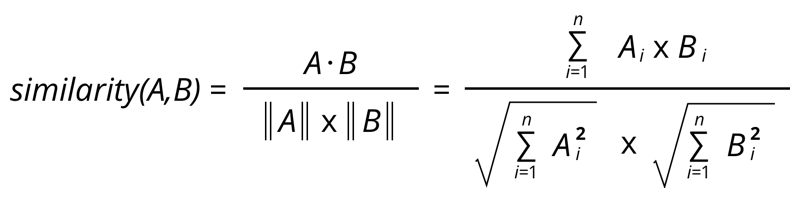

We can use sklearn or even write simple pytho code to calculate similarity between 2 word vectors. You can see if you provide very similar words like london and paris, they will have very high similarity closer to 1.

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
word1 = word1.reshape(1, -1);
word2 = word2.reshape(1, -1);
cosine_similarity(word1, word2)

array([[0.72943505]])

In [157]:
# spacy is a powerful library in Python for NLP tasks
import spacy
nlp = spacy.load("en")

# How do we find word embedding for a sentence??

- We calculate embedding for each word and then average it to find word embedding for a sentence

In [198]:
## - How to find word vector for a sentence. We need to average the word vectors for all words in a sentence.
#sentences = ["book my flight","i am travelling to london","need to visit to london","book my travel","i need to travel"]
sentences = ["table","chair","bed","desk","sofa","queen","king","jack","dog","basket","human"]
listofsentenceembeddings = []
for sentence in sentences:
    word_tokens = nlp(sentence) # // NLP tokenization - splitting individual words as tokens 
    listofembeddings = []
    for word in word_tokens:
        listofembeddings.append(w2v[word.text])
    #print(listofembeddings)
    meanvec = sum(np.asarray(listofembeddings, dtype=float))/float(len(listofembeddings))
    #print(meanvec)
    listofsentenceembeddings.append(meanvec)
print(listofsentenceembeddings)

[array([-0.36661 ,  1.0584  , -0.65378 ,  0.17674 ,  1.0605  , -0.72541 ,
       -0.009721,  0.07969 , -0.4649  , -0.74347 , -0.64147 , -0.16837 ,
       -0.48926 ,  0.56673 ,  0.73102 ,  0.18387 ,  0.34366 , -0.19158 ,
        0.066052, -1.3434  ,  0.50813 , -0.21998 ,  0.46182 ,  0.65796 ,
       -0.19109 , -0.6428  , -0.14994 ,  0.74716 , -0.23347 , -0.16557 ,
        2.8593  ,  0.60577 , -0.63465 ,  0.45448 ,  0.14856 ,  0.53445 ,
        0.27442 ,  1.0104  ,  0.079507, -0.44915 ,  0.46796 , -0.49001 ,
       -0.20323 ,  0.65496 ,  0.16845 ,  0.50674 ,  0.62557 ,  0.071343,
        0.61898 , -0.99744 ]), array([-1.0443e+00,  4.9202e-01, -7.5978e-01, -3.9224e-01,  8.1217e-01,
       -3.9287e-02,  1.6706e-02, -6.8629e-01, -7.8359e-02, -1.3214e+00,
       -1.5354e-01,  2.0438e-01, -4.6503e-01,  1.2145e+00, -1.8217e-01,
        2.7451e-01, -2.4086e-01,  7.1145e-01,  3.2470e-01, -7.1320e-01,
        6.6721e-01,  7.1307e-01, -1.0394e-01, -3.8439e-01, -2.0260e-01,
       -1.4419e+00,  4.2

[[-1.50425842  0.30360441]
 [-0.9707658   0.08077768]
 [-0.92568493 -0.45649868]
 [-2.07208372 -0.85545312]
 [-2.15763946 -1.38686237]
 [ 2.65959785 -2.05079768]
 [ 3.42344083 -1.43993259]
 [ 1.13706689 -0.53353488]
 [ 0.79827921  0.90548416]
 [-2.2259322   1.07552933]
 [ 1.83797975  4.35768373]]


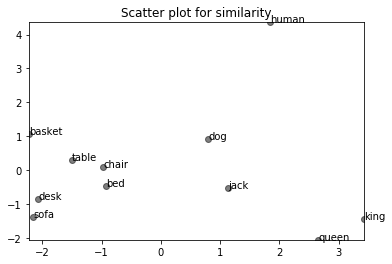

In [199]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=2)
listofsentenceembeddings_transformed = pca.fit_transform(listofsentenceembeddings)
listofsentenceembeddings_transformed
print(listofsentenceembeddings_transformed)
x_coords = listofsentenceembeddings_transformed[:,0]
y_coords = listofsentenceembeddings_transformed[:,1]
plt.scatter(x_coords,y_coords, c=(0,0,0), alpha=0.5)
plt.title('Scatter plot for similarity')


for label, x, y in zip(sentences, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00100, x_coords.max()+0.00100)
plt.ylim(y_coords.min()-0.00100, y_coords.max()+0.00100)
plt.show()
    
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


<h4> you can see similar words are getting closer to each other. Now we will use a SVM classifier to find the decision boundary to seperate each intent
 </h4>

## Backup Cells - Here we are trying to load GloVE embeddings into SpaCy. Spacy requires a particular format https://spacy.io/usage/vectors-similarity

In [65]:
with open('./glove/vocab.txt', 'w') as f:
    for key, value in w2v.items():
        f.write('%s\n' %(key))

In [66]:
with open('./glove/vectors.50.d.bin', 'w') as f:
    for key, value in w2v.items():
        f.write('%s\n' %(value))

In [67]:
import spacy
nlp = spacy.load("en")
nlp.vocab.vectors.from_glove('./glove/spacyvector/vectors')
tokens = nlp('INDIA PAKISTAN CHINA')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

ValueError: cannot reshape array of size 26449183 into shape (528983,50)

In [1]:
import spacy
from sklearn.decomposition import PCA
nlp = spacy.load("en")
animals = "dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated man queen"
animal_tokens = nlp(animals)
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])
pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]


In [2]:
print(animal_vecs_transformed)

[['dog' '-5.3383884' '-1.8036299']
 ['cat' '-4.7337523' '-1.7810915']
 ['hamster' '-4.158726' '12.460593']
 ['lion' '-4.818412' '6.526998']
 ['tiger' '-10.773494' '8.66147']
 ['elephant' '5.0273333' '7.052479']
 ['cheetah' '-4.4140644' '9.115354']
 ['monkey' '-5.6879363' '1.1447694']
 ['gorilla' '-7.755905' '-4.5805182']
 ['antelope' '2.1049476' '-8.478094']
 ['rabbit' '-6.270763' '-5.9856']
 ['mouse' '-10.863121' '-6.163093']
 ['rat' '0.60704803' '-7.363174']
 ['zoo' '-1.8872417' '-7.230035']
 ['home' '0.89732563' '2.1274207']
 ['pet' '6.5108094' '3.8537073']
 ['fluffy' '12.431287' '3.5994475']
 ['wild' '10.380728' '3.8971603']
 ['domesticated' '20.037094' '0.65590185']
 ['man' '0.4910174' '-5.4613843']
 ['queen' '8.214218' '-10.248676']]


In [5]:
animal_tokens = nlp(animals)
animal_vectors = np.vstack([w2v[word.text] for word in animal_tokens if word.has_vector])
pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]

In [6]:
print(animal_vecs_transformed)

[['dog' '0.6136094960905633' '-0.8334105973047161']
 ['cat' '0.04036206657470974' '-0.83471081688339']
 ['hamster' '-1.6419962160679542' '-1.224668788884157']
 ['lion' '0.45296357392608955' '-0.16982604369685195']
 ['tiger' '0.6736395210309059' '0.9750204432287294']
 ['elephant' '-0.3822602209434946' '0.9867223113460212']
 ['cheetah' '-1.4687896541779752' '0.33676652654171224']
 ['monkey' '-0.7113176007923808' '-0.4922034630947023']
 ['gorilla' '-1.2031178939665579' '0.9716663540774058']
 ['antelope' '-1.2972324785336258' '2.1495943049908837']
 ['rabbit' '-0.9536715493691372' '-1.0795138098996542']
 ['mouse' '-1.0406875901375297' '-0.8808996269572705']
 ['rat' '-0.9885547587562197' '-0.16252981918391113']
 ['zoo' '1.0071033825140612' '3.2046527999021617']
 ['home' '3.7657377845135955' '0.728691863659625']
 ['pet' '-0.17669288060292682' '-0.23229142605211853']
 ['fluffy' '-1.2372998729313422' '-2.7110482144']
 ['wild' '0.4485502031574103' '0.4800705796371562']
 ['domesticated' '-2.12567